## Matricule & noms : 

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 1 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les diff√©rences fondamentales entre Python et Matlab. Ne passez pas forcement par les √©tapes d'installation.
</div>

L‚Äôobjet de ce travail est de mettre en pratique certains des traitements √©l√©mentaires dans le domaine spatial qui ont √©t√© pr√©sent√©s en cours, tout en permettant une familiarisation avec Python et ses outils de traitement d‚Äôimages. Trois points seront abord√©s :
1. Les transformations g√©om√©triques
2. Le d√©bruitage par filtrage dans le domaine spatial
3. L‚Äôam√©lioration d‚Äôimages par manipulation d‚Äôhistogramme et masque flou

Les fonctions et les donn√©es √† utiliser pour effectuer ce travail pratique se trouvent
dans l‚Äôarchive ZIP de ce TP disponible sur le site web du cours. 

**Pond√©ration**
- Transformations g√©om√©triques : 6 pts
- D√©bruitage par filtrage spatial : 6 pts
- Am√©lioration d‚Äôimages : 6 pts
- Qualit√©s de la langue et du rapport : 2 pts
- Total : 20 points

**Date de remise**
- Groupe 1: 14 f√©vrier 23h59
- Groupe 2: 21 f√©vrier 23h59

##  1. Transformations g√©om√©triques (6 pts)

L‚Äôinterpolation est un √©l√©ment central de toute transformation g√©om√©trique d‚Äôimage.
L‚Äôobjet de cette question est de mettre en ≈ìuvre une forme √©l√©mentaire d‚Äôinterpolation et
de l‚Äôutiliser dans une transformation g√©om√©trique particuli√®rement simple : le changement
d‚Äô√©chelle d‚Äôune image √† l‚Äôaide d‚Äôune interpolation par plus proche voisin.
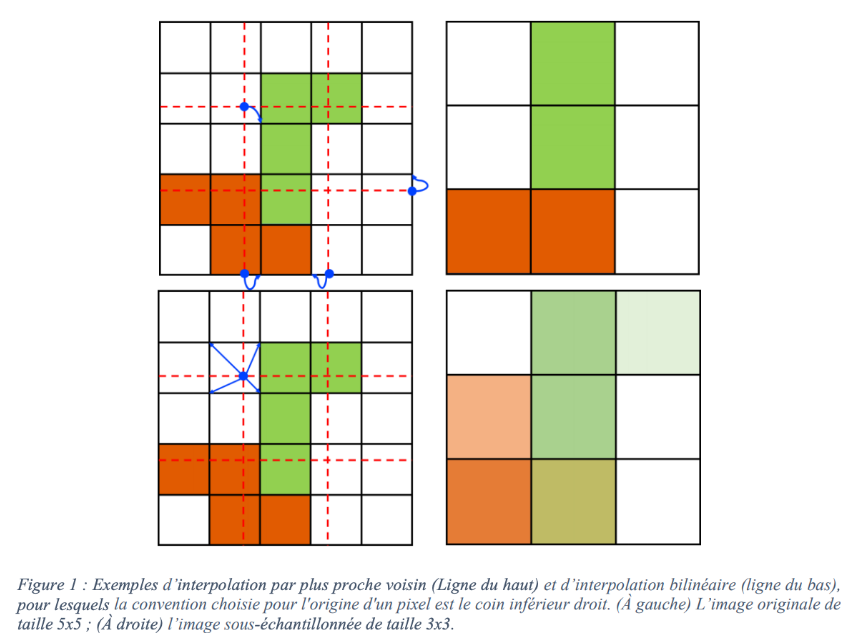

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions ext√©rieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appel√©es ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appel√©s ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
%matplotlib inline
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)


### 1.1. Fonction de changement d‚Äô√©chelle (3 pts)
<div class="alert alert-block alert-warning">
D√©veloppez une fonction d√©finie comme suit. <br>

- Indiquez la mani√®re dont vous d√©finissez les coordonn√©es de l‚Äôorigine de chaque pixel d‚Äôune image (ex : au centre du pixel, dans le coin sup√©rieur gauche ‚Ä¶)

- D√©crivez chacune des √©tapes vous permettant de passer de l‚Äôimage im √† l‚Äôimage ims.

<b>Remarque</b> : Dans la fonction mae_ppv que vous d√©velopperez, vous ne devez pas utiliser
les fonctions d‚Äôinterpolation existantes. Par contre, vous pouvez vous inspirer de la fonction mae_bil.m qui impl√©mente une interpolation bilin√©aire.
    </div>

In [2]:
# Inscrivez votre code ici
# Compl√©ter la fonction suivante faisant de l'interpolation par plus proche voisin.
def mae_ppv(im, sc):
    """ Interpolation par plus proche voisin d'une image im.
    im (nd.array): Image √† interpoler.
    sc (float): Facteur d'√©chelle.
    
    Return:
        nd.array: Image interporl√©e.
    """
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    
    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return
    
    M, N = im.shape 

    
    Ms, Ns = [round(M * sc), round(N * sc)]   
 
    ims = np.zeros((Ms,Ns))
    
    for i in range(Ms):
        for j in range(Ns):
            ims[i,j] = im[round(i/sc),round(j/sc)]
        
        
    
   
    return ims

In [3]:
def mae_bil(im, sc):
    """ Interpolation bilin√©aire d'une image im.
    im (nd.array): Image √† interpoler.
    sc (float): Facteur d'√©chelle.
    
    Return:
        nd.array: Image interporl√©e.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonn√©es de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)
    
    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)  

    # Interpolation bilin√©aire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]
    
    return ims

### 1.2. Effet de l‚Äôinterpolation (3 pts)
<div class="alert alert-block alert-warning">

- Pour mettre en √©vidence l‚Äôeffet de l‚Äôinterpolation, utilisez la fonction que vous avez
d√©velopp√©e pour changer l‚Äô√©chelle de l‚Äôimage Barbara.tif d‚Äôun facteur Œ±
inf√©rieur √† 1. Utilisez ensuite la m√™me fonction et un facteur de 1/ Œ± pour la ramener
l‚Äôimage transform√©e √† son √©chelle initiale.
  </div>

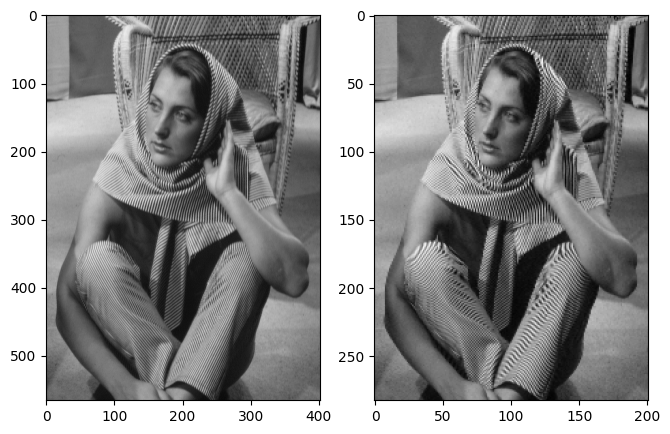

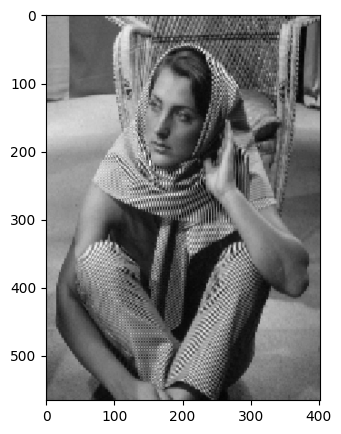

In [4]:
# Inscrivez votre code ici

oldIm = imread('Barbara.tif')
sc = 0.5
reSc = 1/sc
newIm = mae_ppv(oldIm,sc)
reIm = mae_ppv(newIm,reSc)
plt.subplot(1,3,1)
plt.imshow(oldIm, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(newIm, cmap = 'gray')
plt.show()
plt.subplot(1,3,3)
plt.imshow(reIm, cmap = 'gray')
plt.show()

<div class="alert alert-block alert-warning">


- Effectuez les m√™mes op√©rations avec la fonction mae_bil,
qui utilise une interpolation bilin√©aire.
  </div>

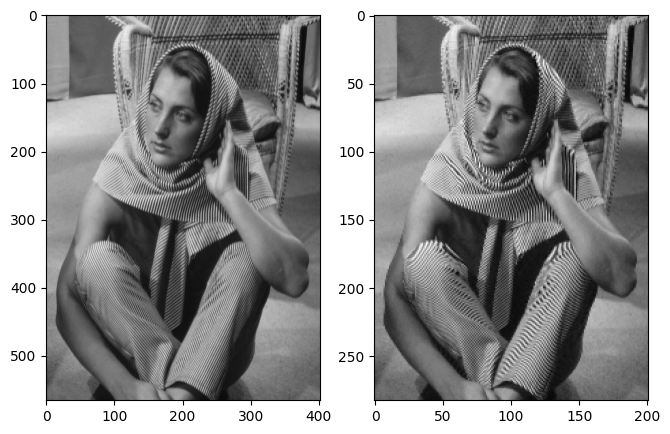

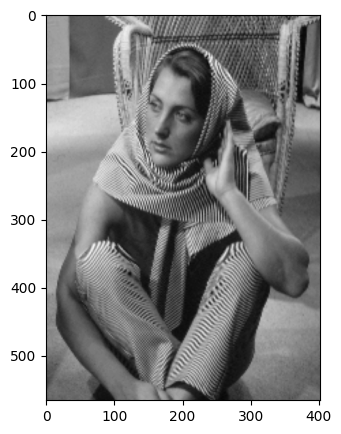

In [5]:
# Inscrivez votre code ici
 # Inscrivez votre code ici
oldIm2 = imread('Barbara.tif')
sc = 0.5
reSc = 1/sc
newIm2 = mae_bil(oldIm2,sc)
reIm2 = mae_bil(newIm2,reSc)
plt.subplot(1,3,1)
plt.imshow(oldIm2, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(newIm2, cmap = 'gray')
plt.show()
plt.subplot(1,3,3)
plt.imshow(reIm2, cmap = 'gray')
plt.show()

<div class="alert alert-block alert-warning">

- Qu‚Äôobservez-vous ? Est-ce que les deux sch√©mas d‚Äôinterpolation permettent de
reproduire fid√®lement l‚Äôimage originale ? √Ä quoi sont dues les diff√©rences
observ√©es ? Pour r√©pondre √† cette question, vous pouvez calculer l‚Äôerreur
quadratique moyenne entre les images.

\begin{equation*}
\Delta Q = \frac 1 n  \sum_{i,j}\left( I \left( i,j \right) - I' \left( i,j \right) \right)^2
\end{equation*}


O√π n est le nombre de pixel dans l‚Äôimage, ùêº(ùëñ,ùëó) est un pixel de l‚Äôimage original et
ùêº‚Äô(ùëñ,ùëó) est le pixel correspondant dans l‚Äôimage transform√©e. Vous pouvez aussi
observer l‚Äôhistogramme des diff√©rences d‚Äôintensit√© entre les images.

 </div>


In [6]:
# Inscrivez votre code ici
M, N = oldIm.shape
n = M*N
error = 0

for i in range(M):
    for j in range(N):
        error += (oldIm[i,j]-reIm[i,j])**2
        
TrueError =(1/n)*error
print('erreur = ', TrueError)

erreur =  447.2376237188615


<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE R√âPONSE

<div class="alert alert-block alert-warning">
- Quels artefacts (d√©fauts) observez-vous dans les images r√©duites et reconstruites ?
    </div>

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE R√âPONSE

## 2. D√©bruitage par filtrage spatial (6 pts)
<div class="alert alert-block alert-warning">


Le fichier IRM_genou.tif de l‚Äôarchive TP1.zip contient l‚Äôimage d‚Äôun genou obtenue
en imagerie par r√©sonance magn√©tique nucl√©aire (IRM). Cette image est d√©grad√©e par un
bruit relativement important. Le but de cette question est de mettre en ≈ìuvre et de comparer
plusieurs filtres spatiaux, lin√©aires ou non. D√©veloppez et mettez en ≈ìuvre les filtres
suivants :

- Moyennage simple sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.
- Moyennage pond√©r√© de type gaussien sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.
- Filtrage m√©dian sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.

La librairie OpenCV vous permet d'appliquer ces filtres (voir [documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)). L‚Äôimage filtr√©e doit √™tre de m√™me type et avoir la m√™me taille que l‚Äôimage de d√©part.
Comparez empiriquement les r√©sultats, en vous basant notamment sur le bruit r√©siduel, sur
la nettet√© des contours des images filtr√©es et sur l‚Äôerreur quadratique moyenne. Vous
pouvez au besoin vous appuyer sur leur histogramme. Le bruit r√©siduel Œü(ùë•, ùë¶) peut √™tre
calcul√© en soustrayant l‚Äôimage filtr√©e ùêº‚Ä≤(ùë•, ùë¶) √† l‚Äôimage originale ùêº(ùë•, ùë¶).

\begin{equation*}
Œü(ùë•, ùë¶) = |ùêº(ùë•, ùë¶) ‚àí ùêº‚Ä≤(ùë•, ùë¶)|
\end{equation*}


Discutez de l‚Äôeffet du type de filtre (moyenne simple, moyenne pond√©r√©e, m√©dian) et de la
taille du filtre (3, 5, ou 7 pixels) sur les r√©sultats de d√©bruitage. 
    </div>

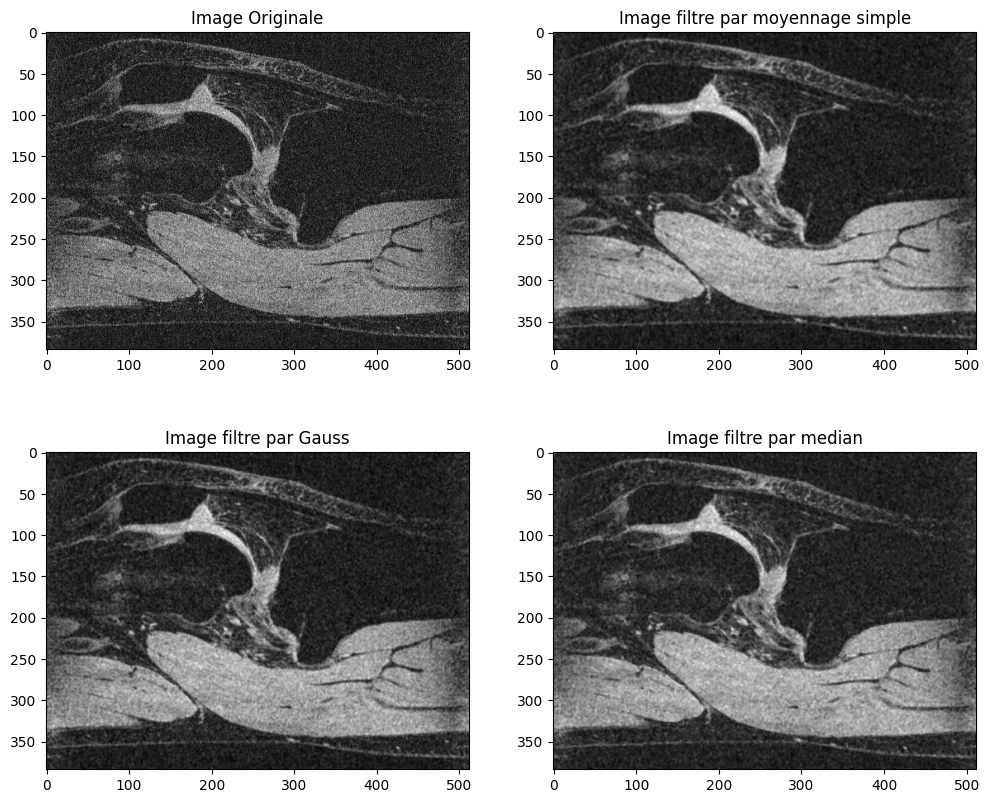

In [7]:
# Inscrivez votre code ici

og_Im = imread('IRM_genou.tif')
moy_Im = cv2.blur(og_Im, (3,3))
gauss_Im = cv2.GaussianBlur(og_Im, (3,3),0)
med_Im = cv2.medianBlur(og_Im,3)


plt.subplot(2,2,1)
plt.imshow(og_Im, cmap = 'gray')
plt.title ('Image Originale')


plt.subplot(2,2,2)
plt.imshow(moy_Im, cmap = 'gray')
plt.title('Image filtre par moyennage simple')

                        
plt.subplot(2,2,3)
plt.imshow(gauss_Im, cmap = 'gray')
plt.title('Image filtre par Gauss')

                        
plt.subplot(2,2,4)
plt.imshow(med_Im, cmap = 'gray')
plt.title('Image filtre par median')
plt.show()

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE R√âPONSE

## 3. Am√©lioration d‚Äôimages (6 pts)

Le fichier Lune.tif contient une image de la lune de qualit√© m√©diocre, tant du point de
vue de la distribution des niveaux de gris que de la nettet√©. Le but de cette question est
donc d‚Äôappliquer une succession de traitements pour am√©liorer la qualit√© de cette image.

### 3.1. Transformations portant sur l‚Äôintensit√© (2 pts)
<div class="alert alert-block alert-warning">

En vous basant sur l‚Äôhistogramme, effectuez une ou plusieurs transformations portant sur
l‚Äôintensit√© de l‚Äôimage pour en am√©liorer le contraste et l‚Äôaspect visuel. Quelques
transformations que vous pouvez essayer pour am√©liorer le contraste sont :

| Transformation | Param√®tre(s) | √âquation |
| --- | --- | --- |
| Inversion | NA | 1 ‚Äì ùëü |
|Gamma |   ùõæ < 1 si sous-expos√© <br/> ùõæ > 1 si surexpos√© | ùëü<sup>ùõæ</sup> |
| Logarithme | NA | ln(1 + ùëü) /ln(2) |
| Exponentielle | NA | ùëí<sup>ùëüùëôùëõ(2)</sup> ‚àí 1|

<center> ** r correspond √† la valeur d‚Äôun pixel dans l‚Äôimage </center>

<b>Note</b> : Il n‚Äôest pas conseill√© de proc√©der √† l‚Äô√©galisation de l‚Äôhistogramme √† cette √©tape-ci.
Expliquez votre choix de transformation que vous avez utilis√© pour am√©liorer l‚Äôaspect
visuel de l‚Äôimage.

</div>

540 466


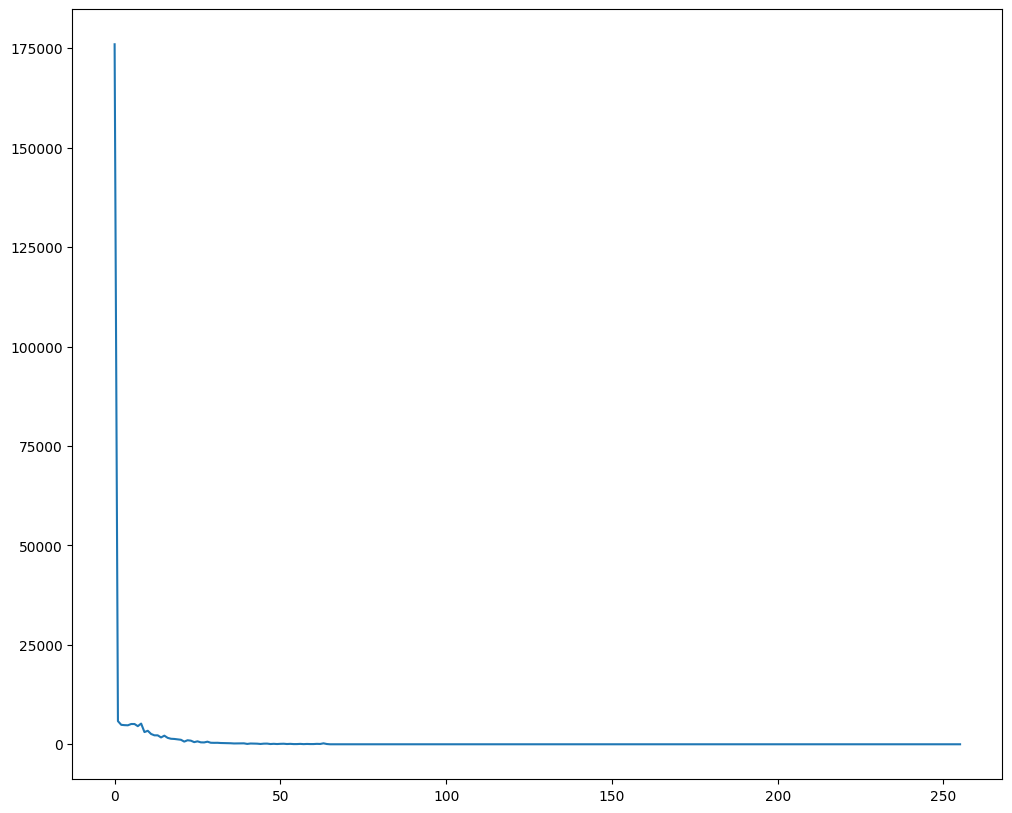

(540, 466)


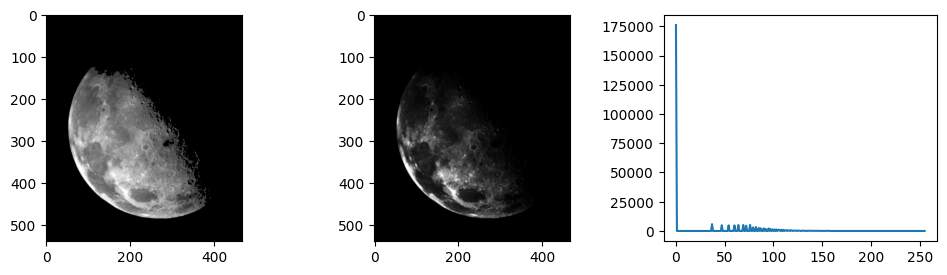

In [8]:
# Inscrivez votre code ici

luneIm = cv2.imread("Lune.tif", cv2.IMREAD_GRAYSCALE)

M,N = luneIm.shape
print(M,N)
histr = cv2.calcHist([luneIm],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()
#plt.imshow(luneIm)

# Define the gamma value

img = luneIm
# Apply the correction
#s = cv2.pow(img/255, gamma)*255
#s = 0.02 * np.log(1 + img)
#s = (np.log(1 + img)) / (np.log(2))
#s = (np.exp(np.log(2)) - 1) * img
#s = 1 - img
s = cv2.pow(img/255, 0.35)
print(s.shape)
s = cv2.convertScaleAbs(s, alpha=255)

# Check if the image is loaded successfully
plt.subplot(3,3,1)
plt.imshow(s, cmap = 'gray')
plt.subplot(3,3,2)
plt.imshow(img, cmap = 'gray')
plt.subplot(3,3,3)

histr = cv2.calcHist([s],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE R√âPONSE

### 3.2. Affinage de l‚Äôimage (2 pts)
<div class="alert alert-block alert-warning">


Appliquez √† l‚Äôimage obtenue √† la question pr√©c√©dente un rehaussement par masquage flou
g√©n√©ralis√© (Unsharp Filter / Masking en anglais). Ce filtre de convolution est d√©fini par

<center> ùê∫ = ùêπ + ùëé [ ùêπ ‚àí ‚Ñé<sub>ùëè</sub> ‚àó ùêπ ] = ùêπ + ùëé [ ùêπ ‚àí ùêπ‚Ä≤ ] </center>

o√π F est l‚Äôimage originale, G est l‚Äôimage rehauss√©e, hb est un noyau de convolution agissant
comme un filtre passe-bas, * est un produit de convolution, a est le coefficient de
rehaussement et b contr√¥le la taille du filtre adoucisseur. Utilisez le filtre par moyennage
pond√©r√© de type Gaussien d√©velopp√© √† la question pr√©c√©dente pour calculer l‚Äôimage floue
ùêπ‚Ä≤ = ‚Ñé<sub>ùëè</sub> ‚àó ùêπ.

Faites varier la taille du filtre adoucisseur et le coefficient de rehaussement. Qu‚Äôobservezvous ? D√©crivez l‚Äôeffet de ces param√®tres sur l‚Äôimage rehauss√©e.
</div>

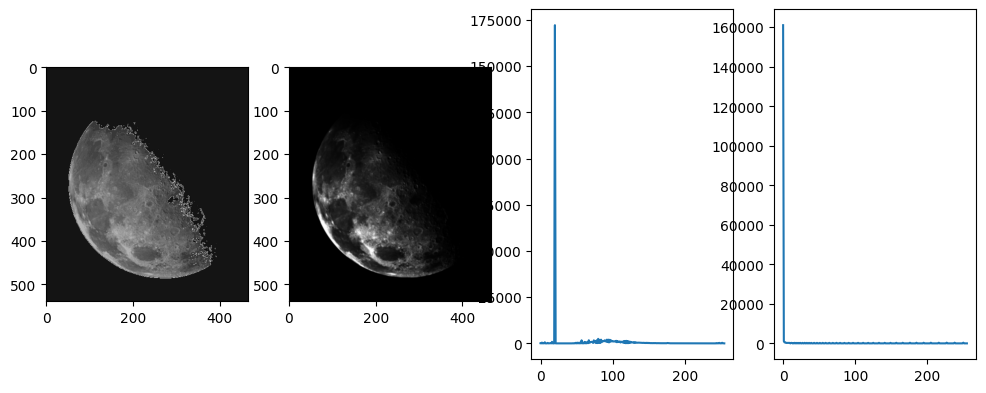

In [15]:
# Inscrivez votre code ici



luneIm = imread('Lune.tif')
gauss_Im = cv2.GaussianBlur(s, (3,3),0)




f = s  +2*(s - gauss_Im) +20

plt.subplot(2,4,1)
plt.imshow(f, cmap = 'gray')
plt.subplot(2,4,2)
plt.imshow(luneIm, cmap = 'gray')
histr = cv2.calcHist([f],[0],None,[256],[0,256])
plt.subplot(2,4,3)
plt.plot(histr)
plt.subplot(2,4,4)
histr = cv2.calcHist([luneIm],[0],None,[256],[0,256])
plt.subplot(2,4,4)
plt.plot(histr)

### 3.3. √âgalisation d‚Äôhistogramme (2 pts)
<div class="alert alert-block alert-warning">


Appliquez une √©galisation d‚Äôhistogramme √† une image visuellement satisfaisante obtenue
√† la question pr√©c√©dente. Qu‚Äôobservez-vous ? Expliquez. Comparez au r√©sultat obtenu si
vous appliquez l‚Äô√©galisation d‚Äôhistogramme √† l‚Äôimage de la Lune originale sans transformer
son intensit√© et sans la rehausser par masquage flou. Pourquoi les r√©sultats sont-ils
diff√©rents ?
     Vous pouvez utiliser la fonction <code>equalize_histogram(img)</code> et <code>plt.hist</code> de matplotlib.
    
</div>

In [10]:
def equalize_histogram(img):
    # Normaliser l'image de 0 √† 255
    img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
    hist, bins = np.histogram(img, 256, [0,256])
    T = np.cumsum(hist) # Somme cumul√©e
    T = (T - T.min()) / (T.max() - T.min()) # Normalisation entre 0 et 1
    return (255 * T[img]).astype('uint8')


In [11]:
# Inscrivez votre code ici
f = equalize_histogram(f)
#plt.imshow(f, cmap = 'gray')
histr = cv2.calcHist([f],[0],None,[256],[0,256])
#plt.subplot(8,1,2)
#plt.plot(histr)

luneImEq = equalize_histogram(luneIm)
#plt.imshow(luneImEq, cmap = 'gray')
histr = cv2.calcHist([luneImEq],[0],None,[256],[0,256])
#plt.subplot(8,1,4)
#plt.plot(histr)

gauss_Im = cv2.GaussianBlur(luneImEq, (3,3),0)
final = luneImEq  +2*(luneImEq - gauss_Im)  +0.2
#plt.imshow(luneImEqExp, cmap = 'gray')
luneImEqExp = cv2.convertScaleAbs(luneImEqExp, alpha=255)

histr = cv2.calcHist([luneImEqExp],[0],None,[256],[0,256])
#plt.subplot(8,1,6)
#plt.plot(histr)




luneImEqExp = cv2.pow(luneImEq/255, 0.9)

plt.subplot(2,2,1)
plt.imshow(final, cmap = 'gray')
plt.subplot(2,2,2)
plt.plot(histr)


NameError: name 'luneImEqExp' is not defined

<div class="alert alert-block alert-success"> 
DOUBLE-CLIQUEZ POUR INSCRIRE VOTRE R√âPONSE